<a href="https://colab.research.google.com/github/hwangsaeyeon/dacon/blob/main/question%2Ctipi_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [113]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/mood/train.csv",index_col=0)
test = pd.read_csv("/content/drive/MyDrive/mood/test.csv",index_col=0)

In [114]:
train = pd.DataFrame(train)
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1


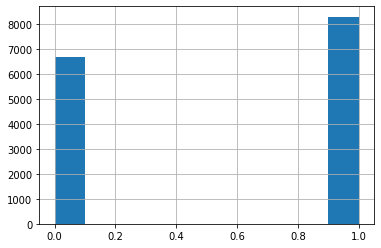

In [115]:
train['nerdiness'].hist()

In [116]:
train = train.drop(['country'],axis=1)

In [117]:
train = train.drop(['introelapse','testelapse','surveyelapse','familysize','religion','age'],axis=1)

In [118]:
#train에서 question에 대한 값이 아예 없는 row삭제(8개)
cols = train.columns
train = train.dropna(how='all',subset =cols[0:26])
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,education,urban,gender,engnat,hand,orientation,voted,married,ASD,nerdiness
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,2.0,1,3.0,1.0,2.0,4.0,2.0,1.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,4.0,2,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,1,1.0,2.0,1.0,2.0,2.0,3.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,3,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,1.0,2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,2,2.0,1.0,1.0,3.0,2.0,1.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,4.0,1,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,2.0,2,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1


In [119]:
"""
val=[]
for i in train.index:
  if train['VCL6'][i] == 1:
    val.append(i)
  elif train['VCL9'][i] == 1:
    val.append(i)
  elif train['VCL12'][i] == 1:
    val.append(i)
len(val)

train = train.drop(val)
del train['VCL6']
del train['VCL9']
del train['VCL12']
"""

"\nval=[]\nfor i in train.index:\n  if train['VCL6'][i] == 1:\n    val.append(i)\n  elif train['VCL9'][i] == 1:\n    val.append(i)\n  elif train['VCL12'][i] == 1:\n    val.append(i)\nlen(val)\n\ntrain = train.drop(val)\ndel train['VCL6']\ndel train['VCL9']\ndel train['VCL12']\n"

In [120]:
"""
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(train['country'])
le.classes_
"""

"\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\nle.fit_transform(train['country'])\nle.classes_\n"

In [121]:
#train = train.drop(['country'],axis=1)

<Figure size 3600x3600 with 0 Axes>

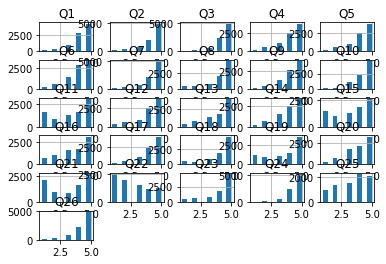

In [122]:
import matplotlib.pyplot as plt
row_one = []
q = []
for i in train.columns[0:26]:
  q.append(i)
for i in train.index:
  if train['nerdiness'][i]==1:
    row_one.append(i)

plt.figure(figsize=(50,50))
train.loc[row_one,q].hist()
plt.show()

<Figure size 3600x3600 with 0 Axes>

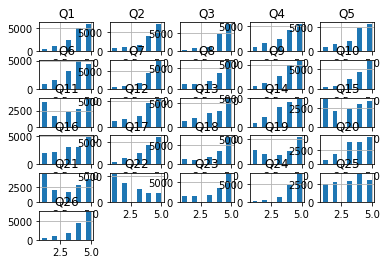

In [123]:
plt.figure(figsize=(50,50))
train.loc[:,q].hist()
plt.show()

<Figure size 3600x3600 with 0 Axes>

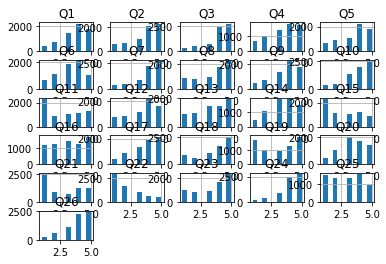

In [124]:
import matplotlib.pyplot as plt
row_zero = []
q = []
for i in train.columns[0:26]:
  q.append(i)
for i in train.index:
  if train['nerdiness'][i]==0:
    row_zero.append(i)

plt.figure(figsize=(50,50))
train.loc[row_zero,q].hist()
plt.show()

In [125]:
question = train.loc[:,q]
one_question = train.loc[row_one,q]
zero_question = train.loc[row_zero,q]

machi_score 

In [126]:
train = train.fillna(0)

In [127]:
for i in train.index:
  train.loc[i,'score'] = sum(train.loc[i,q]) 
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,urban,gender,engnat,hand,orientation,voted,married,ASD,nerdiness,score
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1,3.0,1.0,2.0,4.0,2.0,1.0,2.0,1,95.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,2,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1,85.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,1,1.0,2.0,1.0,2.0,2.0,3.0,2.0,1,96.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,3,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1,91.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2,2.0,1.0,1.0,3.0,2.0,1.0,2.0,0,87.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1,105.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,2,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,120.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16ea319210>,
      dtype=object)

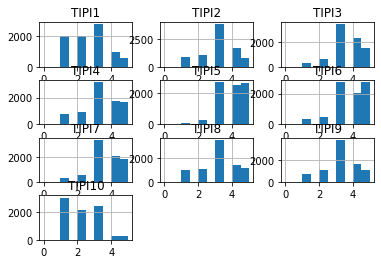

In [128]:
#외향성 : TIPI1	Extraverted, enthusiastic. - TIPI6	Reserved, quiet.
#친화성 : TIPI7	Sympathetic, warm. - TIPI2	Critical, quarrelsome.
#성실성 : TIPI3	Dependable, self-disciplined. - TIPI8	Disorganized, careless.
#정서적 안정성: TIPI9	Calm, emotionally stable. - TIPI4	Anxious, easily upset.
#경험 개방성: TIPI5	Open to new experiences, complex. - TIPI10	Conventional, uncreative.
train.loc[row_one,['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16ea340210>,
      dtype=object)

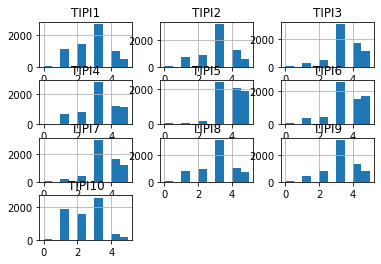

In [129]:
train.loc[row_zero,['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5','TIPI6','TIPI7','TIPI8','TIPI9','TIPI10',]].hist()

In [130]:
#성실성: 3번,8번(reverse)
#친화성: 7번, 2번(reverse)
#정서적 안정성: 9번, 4번(reverse)
#경험 개방성: 5번, 10번(reverse)
#외향성: 1번, 6번(reverse)


for i in train.index:
  if train.loc[i,'TIPI8'] == 0:
    train.loc[i,'tipi_1'] = (train.loc[i,'TIPI3'] + (train.loc[i,'TIPI8']))/2
  train.loc[i,'tipi_1'] = (train.loc[i,'TIPI3'] + (6-train.loc[i,'TIPI8']))/2
  if train.loc[i,'TIPI2'] == 0:
    train.loc[i,'tipi_2'] = (train.loc[i,'TIPI7'] + (train.loc[i,'TIPI2']))/2
  train.loc[i,'tipi_2'] = (train.loc[i,'TIPI7'] + (6-train.loc[i,'TIPI2']))/2
  if train.loc[i,'TIPI4'] == 0:
    train.loc[i,'tipi_3'] = (train.loc[i,'TIPI9'] + (train.loc[i,'TIPI4']))/2
  train.loc[i,'tipi_3'] = (train.loc[i,'TIPI9'] + (6-train.loc[i,'TIPI4']))/2
  if train.loc[i,'TIPI10'] == 0:
    train.loc[i,'tipi_4'] = (train.loc[i,'TIPI5'] + (train.loc[i,'TIPI10']))/2
  train.loc[i,'tipi_4'] = (train.loc[i,'TIPI5'] + (6-train.loc[i,'TIPI10']))/2
  if train.loc[i,'TIPI6'] == 0:
    train.loc[i,'tipi_5'] = (train.loc[i,'TIPI1'] + (train.loc[i,'TIPI6']))/2
  train.loc[i,'tipi_5'] = (train.loc[i,'TIPI1'] + (6-train.loc[i,'TIPI6']))/2
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,voted,married,ASD,nerdiness,score,tipi_1,tipi_2,tipi_3,tipi_4,tipi_5
index,,,,,,,,,,,,,,,,,,,,,
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,2.0,1.0,2.0,1,95.0,4.0,4.0,5.0,3.0,2.5
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,2.0,2.0,1,85.0,4.0,4.5,1.5,3.5,4.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,3.0,2.0,1,96.0,2.5,3.5,5.0,4.5,1.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,2.0,1.0,2.0,1,91.0,2.5,3.5,2.5,4.0,3.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,1.0,2.0,0,90.0,3.0,3.0,2.5,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,2.0,1.0,2.0,0,87.0,3.5,3.5,3.0,3.0,1.5
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1.0,2.0,2.0,1,105.0,4.5,4.0,1.5,4.0,3.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,1.0,1.0,1,120.0,2.5,3.0,1.0,3.0,1.0


In [132]:
from imblearn.over_sampling import SMOTE
y = train['nerdiness']
X = train.drop(columns='nerdiness')
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X,y)

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled , test_size = 0.3)

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))


정확도 : 0.8005623619200642


In [135]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.8004776228352799
